<a href="https://colab.research.google.com/github/As1nth/skillcraftInternship-task1populationAnalysis/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import zipfile
import io

In [ ]:
def get_population_percentage(indicator_code):
    url = f"https://api.worldbank.org/v2/en/indicator/{indicator_code}?downloadformat=csv"
    response = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(response.content))


    data_file = [name for name in z.namelist() if name.endswith('.csv') and 'Metadata' not in name][0]
    df = pd.read_csv(z.open(data_file), skiprows=4)
    india = df[df['Country Name'] == 'India']
    return india['2022'].values[0]


In [ ]:
indicators = {
    "0–14": "SP.POP.0014.TO.ZS",
    "15–64": "SP.POP.1564.TO.ZS",
    "65+": "SP.POP.65UP.TO.ZS"
}

In [ ]:
age_groups = []
percentages = []
for label, code in indicators.items():
    percentage = get_population_percentage(code)
    age_groups.append(label)
    percentages.append(percentage)


In [ ]:
colors = ['yellow', 'blue', 'pink']

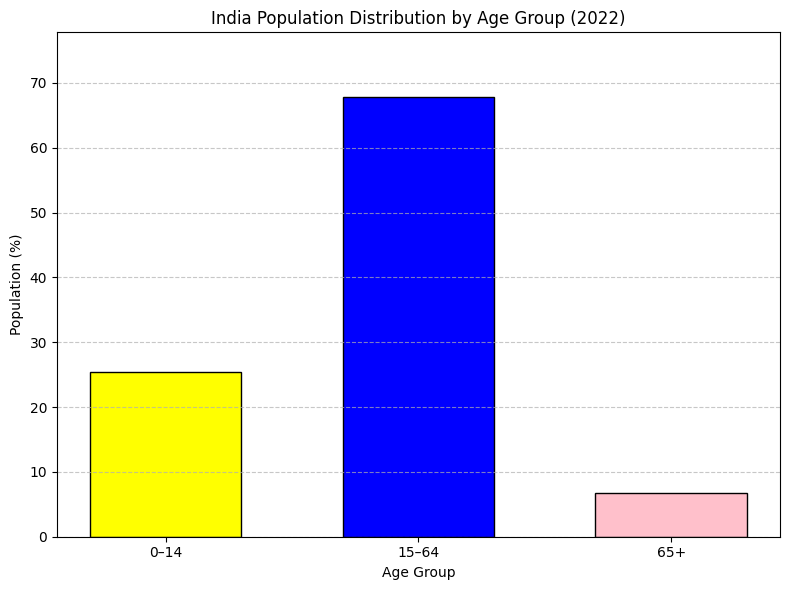

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(age_groups, percentages, color=colors, edgecolor='black', width=0.6)
plt.title('India Population Distribution by Age Group (2022)')
plt.xlabel('Age Group')
plt.ylabel('Population (%)')
plt.ylim(0, max(percentages) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()